# Localised Regression charts

## Set-up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# local import
import plotting
from common import ATTITUDINAL, VOTING_INTENTION
from data_capture import retrieve

In [3]:
plt.style.use("fivethirtyeight")
SHOW = True

## Get data

In [4]:
data = retrieve()
assert data  # check we got something

In [5]:
# Amalgamate the ONP, UAP and OTH columns
vi = plotting.amalgamate_other(data[VOTING_INTENTION])

# let's look at the Primary Vote column names ...
[x for x in vi.columns if "Primary vote" in x]

['Primary vote L/NP',
 'Primary vote ALP',
 'Primary vote GRN',
 'Primary vote ONP',
 'Primary vote UAP',
 'Primary vote OTH',
 'Primary vote Other']

## And plot

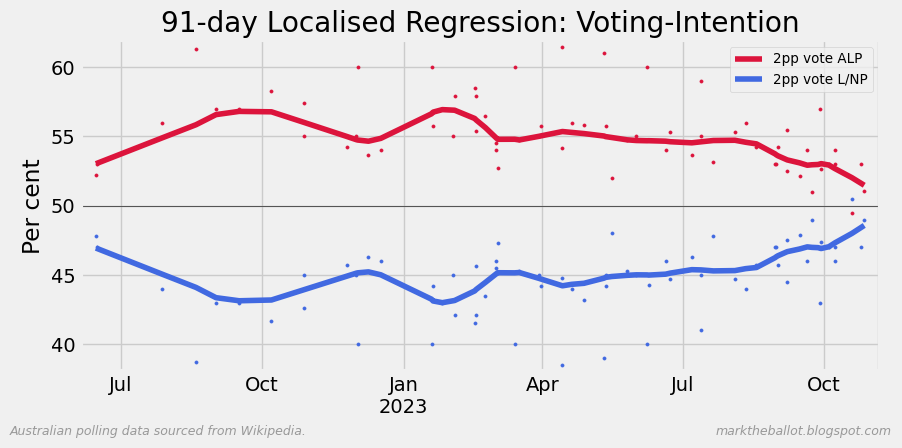

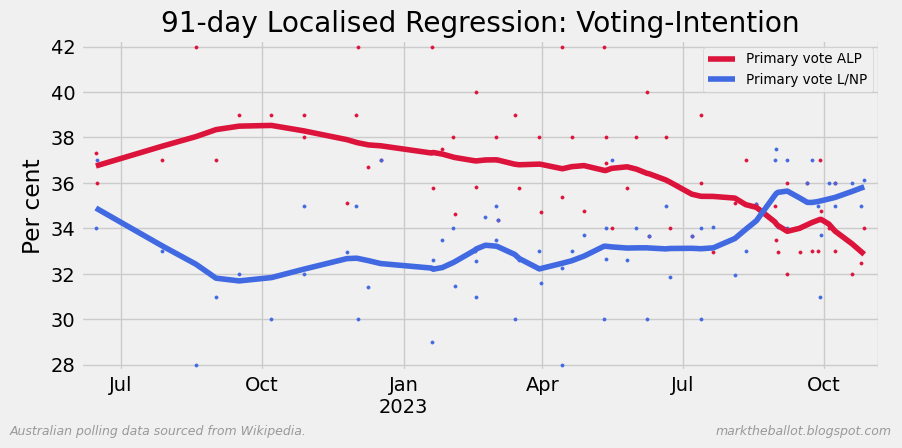

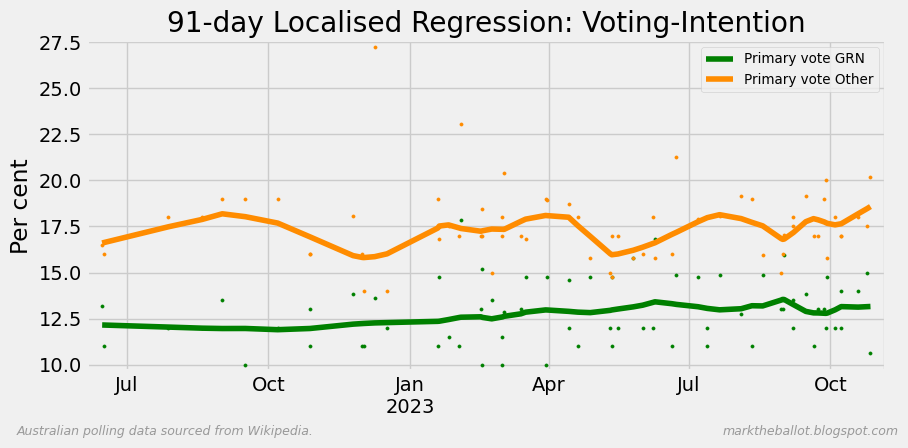

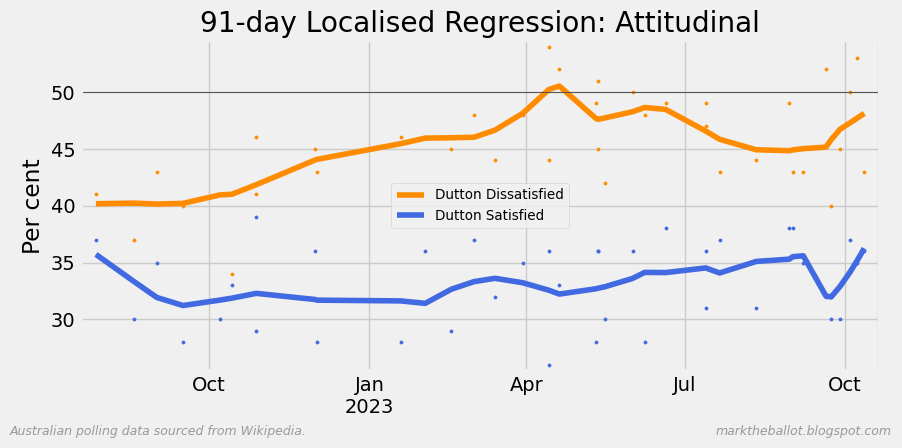

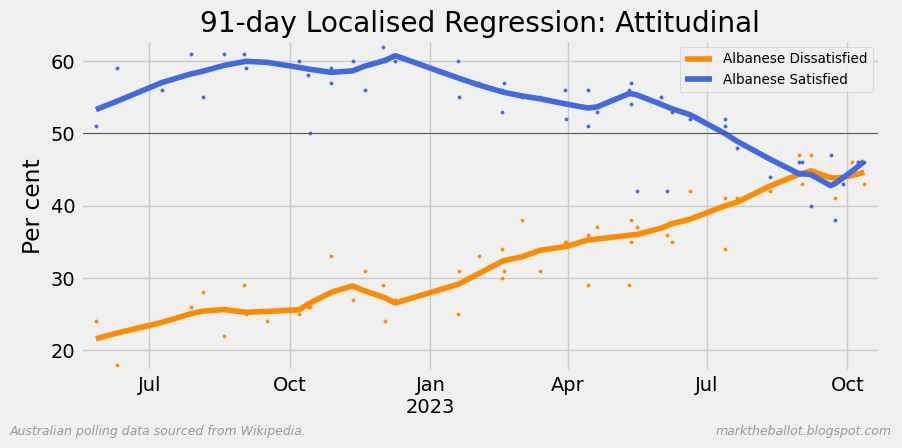

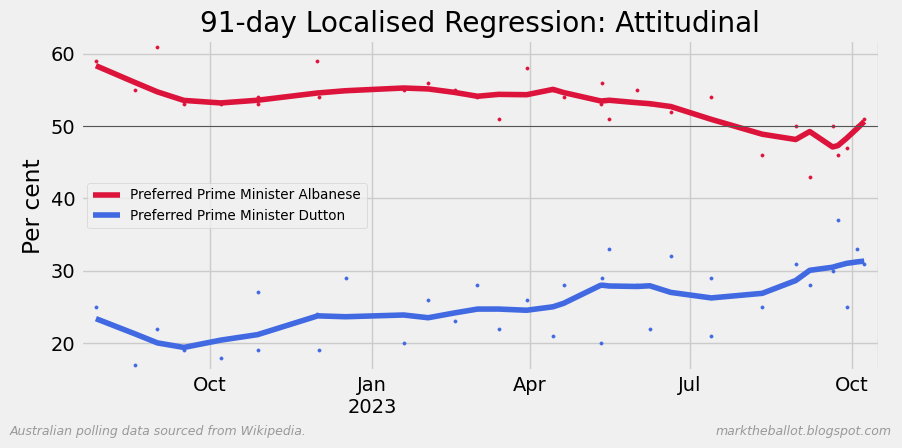

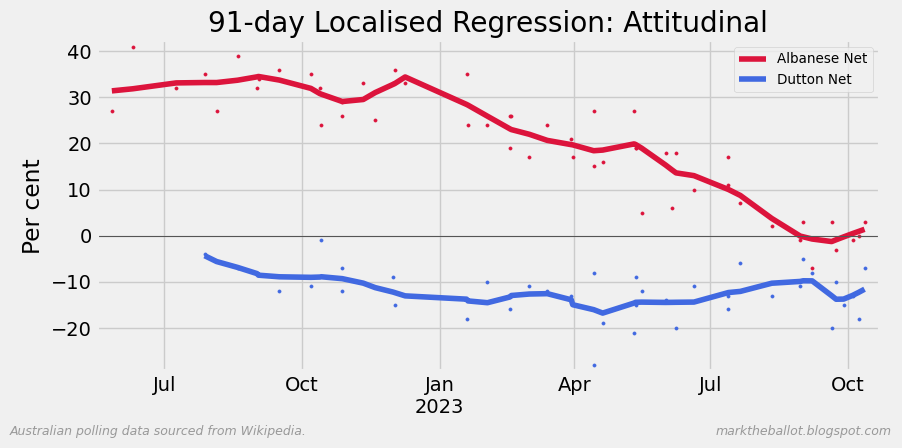

In [6]:
# what we will plot ...
plotable = {
    VOTING_INTENTION: [
        # regex patterns for matching desired columns
        "2pp",
        "Primary vote (L/NP|ALP)",
        "Primary vote (GRN|Other)",
    ],
    ATTITUDINAL: [
        # regex patterns for matching desired columns
        r"^Dutton (Satisfied|Dissatisfied)",
        r"^Albanese (Satisfied|Dissatisfied)",
        r"Preferred Prime Minister (Dutton|Albanese)",
        r"(Dutton|Albanese) Net",
    ],
}

plotting.plot_loess(data, plotable, show=SHOW)

## Finished

In [7]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Thu Nov 02 2023 11:19:35

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.17.2

matplotlib: 3.8.1
pandas    : 2.1.2

Watermark: 2.4.3



In [8]:
print("Finished")

Finished
